# EDA on Haberman's Dataset

# Haberman's Dataset

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
haberman = pd.read_csv("haberman.csv")

In [9]:
#Data Points
print(haberman.shape)

(306, 4)


In [10]:
#column names
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [11]:
haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

In [12]:
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [13]:
haberman['nodes'].max()

52

# 2D-Scatter Plot

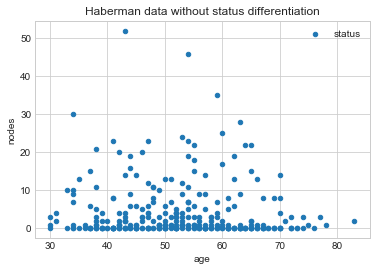

In [14]:
#2D-scatter plot without using color for status differentiation
haberman.plot(kind='scatter', x='age', y='nodes',label='status')
plt.title('Haberman data without status differentiation')
#plt.legend()
plt.show()

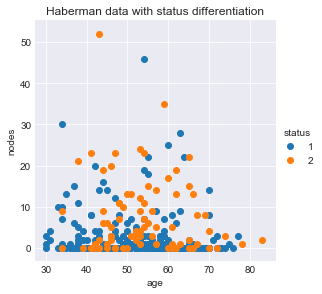

In [15]:
#2D-scatter plot using color for status differentiation
sns.set_style("darkgrid")
sns.FacetGrid(haberman, hue="status", size=4).map(plt.scatter, 'age', 'nodes').add_legend();
plt.title('Haberman data with status differentiation')
plt.show();

# Pair Plot

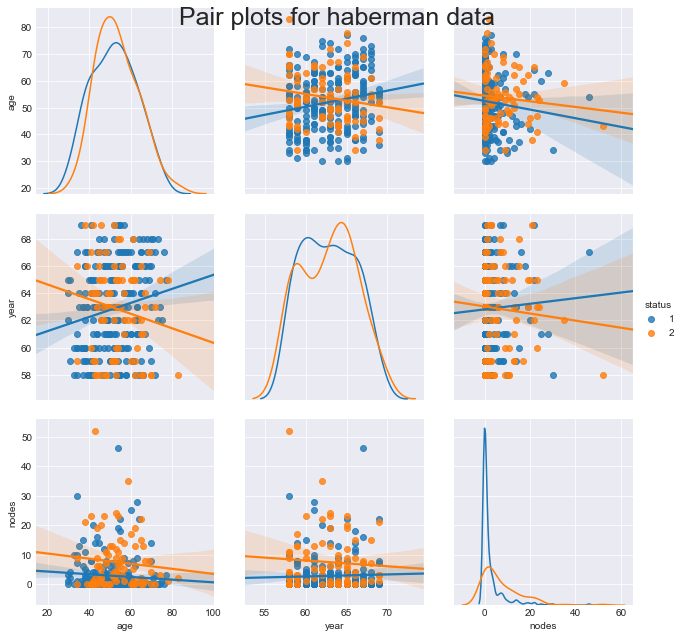

In [16]:
#haberman['status'] = haberman['status'].apply(lambda x: 'Positive' if x == 1 else 'Negative')
#print(haberman)
#or
plt.close();
sns.pairplot(haberman,hue='status',vars=['age','year','nodes'], size=3, kind='reg', diag_kind='kde')
plt.suptitle("Pair plots for haberman data", size=25)
plt.show()

# Histogram, PDF, CDF

# 1-D Scatter plots

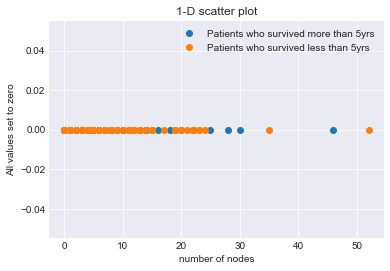

In [17]:
haberman_st1=haberman.loc[haberman['status']==1]
haberman_st2=haberman.loc[haberman['status']==2]
plt.plot(haberman_st1["nodes"], np.zeros_like(haberman_st1['nodes']), 'o', label='Patients who survived more than 5yrs')
plt.plot(haberman_st2["nodes"], np.zeros_like(haberman_st2['nodes']), 'o', label='Patients who survived less than 5yrs')
plt.legend()
plt.xlabel('number of nodes')
plt.ylabel('All values set to zero')
plt.title('1-D scatter plot')
plt.show()

# Probablity Density Function

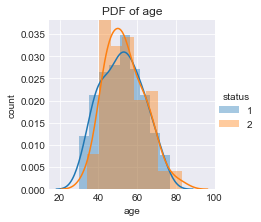

In [28]:
import warnings 
warnings.filterwarnings("ignore")
plt.close();
sns.FacetGrid(haberman, hue='status', size=3).map(sns.distplot, 'age').add_legend()
plt.title('PDF of age')
plt.ylabel('count')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

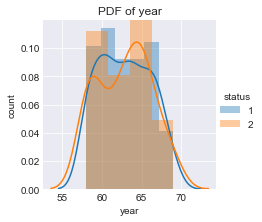

In [29]:
import warnings 
warnings.filterwarnings("ignore")
sns.FacetGrid(haberman, hue='status', size=3).map(sns.distplot, 'year').add_legend()
plt.title('PDF of year')
plt.ylabel('count')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

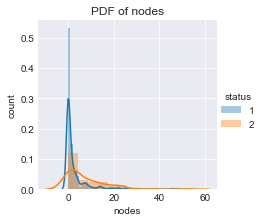

In [30]:
import warnings 
warnings.filterwarnings("ignore")
sns.FacetGrid(haberman, hue='status', size=3).map(sns.distplot, 'nodes').add_legend()
plt.title('PDF of nodes')
plt.ylabel('count')
plt.show

# Cumulative Distribution Function

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


<function matplotlib.pyplot.show(*args, **kw)>

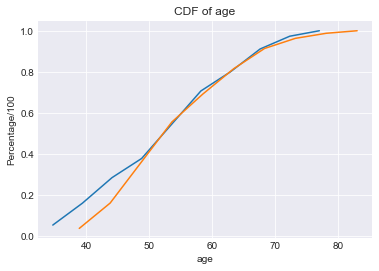

In [31]:
counts, bin_edges = np.histogram(haberman_st1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
#plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.show

counts, bin_edges = np.histogram(haberman_st2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
#plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.title('CDF of age')
plt.xlabel('age')
plt.ylabel('Percentage/100')
plt.show

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


<function matplotlib.pyplot.show(*args, **kw)>

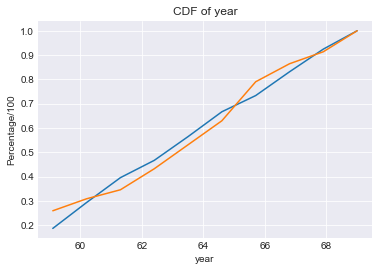

In [32]:
counts, bin_edges = np.histogram(haberman_st1['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
#plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.show

counts, bin_edges = np.histogram(haberman_st2['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
#plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.title('CDF of year')
plt.xlabel('year')
plt.ylabel('Percentage/100')
plt.show

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


<function matplotlib.pyplot.show(*args, **kw)>

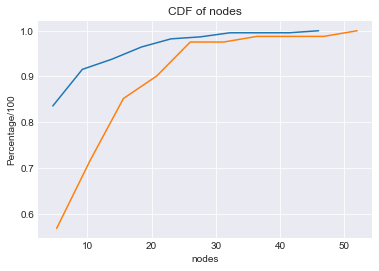

In [33]:
counts, bin_edges = np.histogram(haberman_st1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
#plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.show

counts, bin_edges = np.histogram(haberman_st2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
#plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.title('CDF of nodes')
plt.xlabel('nodes')
plt.ylabel('Percentage/100')
plt.show

# Mean, Variance and Std-dev


In [53]:
print("Means:")
print("Average number of nodes of People who survived for more than 5yrs:")
print(np.mean(haberman_st1["nodes"]))
#Mean with an outlier.
#print(np.mean(np.append(haberman_st1["nodes"],5000)));
print("Average number of nodes of People who survived less than 5yrs:")
print(np.mean(haberman_st2["nodes"]))
print("\nStd-dev:");
print("Standard Deviation of nodes of People who survived for more than 5yrs:")
print(np.std(haberman_st1["nodes"]))
print("Standard Deviation of nodes of People who survived less than 5yrs:")
print(np.std(haberman_st2["nodes"]))

Means:
Average number of nodes of People who survived for more than 5yrs:
2.7911111111111113
Average number of nodes of People who survived less than 5yrs:
7.45679012345679

Std-dev:
Standard Deviation of nodes of People who survived for more than 5yrs:
5.857258449412131
Standard Deviation of nodes of People who survived less than 5yrs:
9.128776076761632


# Median, Percentile, Quantile, IQR, MAD

In [34]:
print("\nMedians:")
print("Average age of People who survived for more than 5yrs:")
print(np.median(haberman_st1["age"]))
#Median with an outlier
#print(np.median(np.append(haberman_st1["age"],50000)));
print("Average age of People who survived less than 5yrs:")
print(np.median(haberman_st2["age"]))

print("\nQuantiles:")
print("Quartiles of  age of People who survived for more than 5yrs:")
print(np.percentile(haberman_st1["age"],np.arange(0, 100, 25)))
print("Quartiles of  age of People who survived less than 5yrs:")
print(np.percentile(haberman_st2["age"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print("90th Percentiles of  age of People who survived for more than 5yrs:")
print(np.percentile(haberman_st1["age"],90))
print("90th Percentiles of  age of People who survived less than 5yrs:")
print(np.percentile(haberman_st2["age"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print("Median Absolute Deviation of  age of People who survived for more than 5yrs:")
print(robust.mad(haberman_st1["age"]))
print("Median Absolute Deviation of  age of People who survived less than 5yrs:")
print(robust.mad(haberman_st2["age"]))


Medians:
Average age of People who survived for more than 5yrs:
52.0
Average age of People who survived less than 5yrs:
53.0

Quantiles:
Quartiles of  age of People who survived for more than 5yrs:
[30. 43. 52. 60.]
Quartiles of  age of People who survived less than 5yrs:
[34. 46. 53. 61.]

90th Percentiles:
90th Percentiles of  age of People who survived for more than 5yrs:
67.0
90th Percentiles of  age of People who survived less than 5yrs:
67.0

Median Absolute Deviation
Median Absolute Deviation of  age of People who survived for more than 5yrs:
13.343419966550417
Median Absolute Deviation of  age of People who survived less than 5yrs:
11.860817748044816


# Box Plots

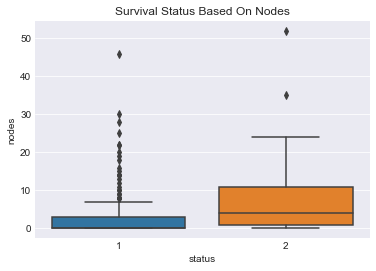

In [35]:
sns.boxplot(x='status',y='nodes', data=haberman)
plt.title('Survival Status Based On Nodes')
plt.show()

# Violin Plot

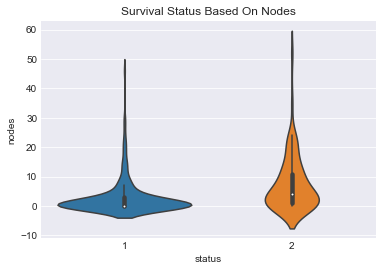

In [36]:
sns.violinplot(x='status',y='nodes', data=haberman)
plt.title('Survival Status Based On Nodes')
plt.show()

# Contour Plot

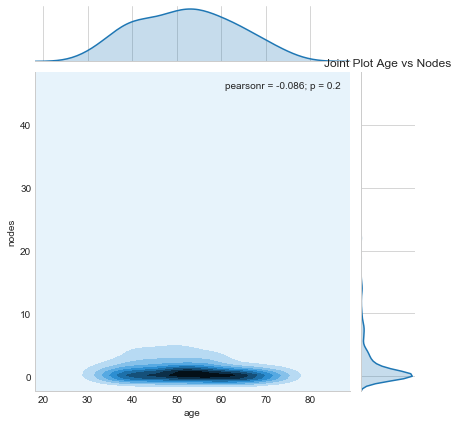

In [49]:
import warnings 
warnings.filterwarnings("ignore")
sns.jointplot(x="age", y="nodes", data=haberman_st1, kind="kde");
plt.title('Joint Plot Age vs Nodes')
plt.show();

Observation:
The above shows the joint plot of patients with more than 5yrs survival. The count of patients with age 53 is more than the count of patients with any other age, who survived more than 5 years. Also people who had less than 4 nodes have a better chance of surviving more than 5 years.

# Conclusion